# Transport of macroplastic

A notebook to try and understand the model of [Newbould et al. (2021)](https://www.frontiersin.org/articles/10.3389/frwa.2021.724596/full). This model is a stochastic model where the porobability of plastic gettign trapped wihtin the river reach is defined by a set of probabilities related to the channel width, vegetation and meanders. I want to first explore how the model works and then try to code it up for an imaginary river in 1D...

The model begins by assume a piece of macroplastic will travel from segment to segment based on the probablity of getting traped. This is tested at each cell by assuming the probability of becoming trapped is a mlinear addition of three probabilities: trapping in a meander bend, trapping in a channel bank, and trapping in vegetation. To begin with I will make a simple line of segments with a single probability of getting trapped. I will then send a particle down it and see what happens.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython.display import display, clear_output

In [21]:
nx = 101
river = np.linspace(0,10,nx)
pTrapped = 0.8
pRelease = 0.5

In [13]:
finished = False
n = 0
location = river[n]
while finished == False:
    plastic = np.random.random()
    print(location)
    if plastic < pTrapped:
        plastic = np.random.random()
        if plastic > pRelease:
            n = n + 1
            location = river[n]
            if n >= nx - 1:
                finished = True        
    else:
        n = n + 1
        location = river[n]
        if n >= nx - 1:
            finished = True

0.0
1.0
2.0
2.0
2.0
3.0
3.0
4.0
5.0
6.0
6.0
7.0
8.0
9.0
9.0


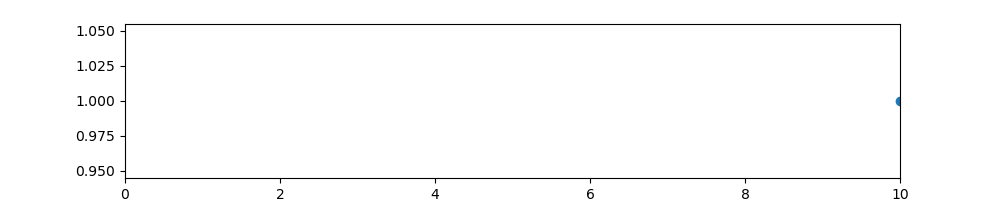

In [22]:
finished = False
n = 0
location = river[n]
fig, ax = plt.subplots(figsize=(10, 2))
spot, = ax.plot(location, 1, 'o')
plt.xlim(0, river.max())

while finished == False:
    plastic = np.random.random()
    #print(location)
    if plastic < pTrapped:
        plastic = np.random.random()
        if plastic > pRelease:
            n = n + 1
            location = river[n]
            if n >= nx - 1:
                finished = True
            
    else:
        n = n + 1
        location = river[n]
        if n >= nx - 1:
                finished = True
    
    # updating plot
    spot.set_xdata(location)
 
    # drawing updated values
    fig.canvas.draw()
    
    display(fig)    
    clear_output(wait = True)
 
    time.sleep(0.1)

## Add a more complex probablity with system length

Probability of getting trapped:
$$ p(T) = 1 - \left(1-p(M)\right)\times\left(1-p(CB)\right)\times\left(1-p(V)\right) $$
where $p(M)$ is the probability of getting stuck in a meander, $p(CB)$ is the probability of getting trapped in a channel bank, and $p(V)$ is the probability of getting trapped in vegitation. The first two can be related to the morphology of a river, while the last one can be callibrated against arial photos or satalite images. I'll just make them functions of distance for now.

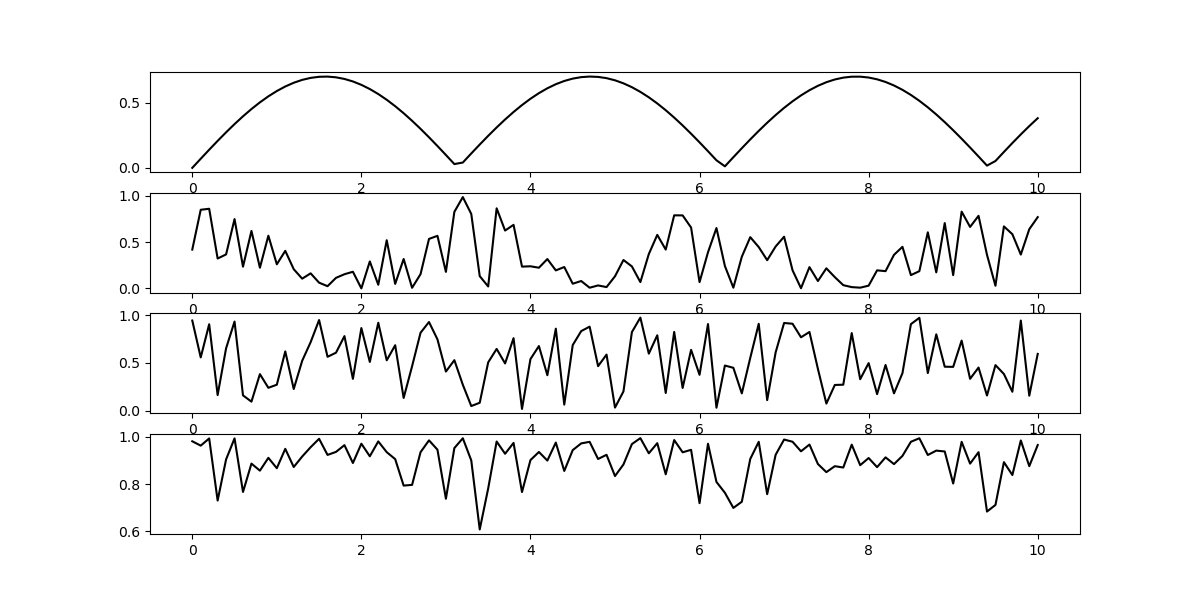

In [30]:
pMeander = np.abs(np.sin(river)) * 0.7
pChannel = np.abs(np.cos(river)) * np.random.random((nx,))
pVegetation = np.random.random((nx,))
pTrapped = 1 - (1 - pMeander)*(1 - pChannel)*(1 - pVegetation) * 0.6

fig, ax = plt.subplots(figsize=(12, 6))
ax1 = plt.subplot(4,1,1)
ax1.plot(river, pMeander, 'k')
ax1 = plt.subplot(4,1,2)
ax1.plot(river, pChannel, 'k')
ax1 = plt.subplot(4,1,3)
ax1.plot(river, pVegetation, 'k')
ax1 = plt.subplot(4,1,4)
ax1.plot(river, pTrapped, 'k')
plt.show()

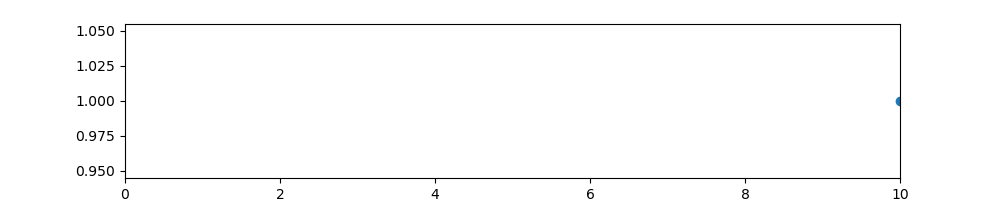

In [31]:
finished = False
n = 0
location = river[n]
fig, ax = plt.subplots(figsize=(10, 2))
spot, = ax.plot(location, 1, 'o')
plt.xlim(0, river.max())

while finished == False:
    plastic = np.random.random()
    #print(location)
    if plastic < pTrapped[n]:
        plastic = np.random.random()
        if plastic > pRelease:
            n = n + 1
            location = river[n]
            if n >= nx - 1:
                finished = True
            
    else:
        n = n + 1
        location = river[n]
        if n >= nx - 1:
                finished = True
    
    # updating plot
    spot.set_xdata(location)
 
    # drawing updated values
    fig.canvas.draw()
    
    display(fig)    
    clear_output(wait = True)
 
    time.sleep(0.1)